# Lab 1 - Moddeling, Model analyses & Simulation

In this lab we will create an model of the inverted pendulum problem.  
You will do the following things individualy, you are allowed to discuss.

* Create a basic model of a regular pendulum
* Create a phase portraid of the pendulum's behaviour using numerical methods
* Changing the carataristics of the model manualy to match with the real-word model
* Add the remaining actuation to the model
* Create a function to infuence the amount of actuation (from discreet to continuem)
* Expiriment to see if you can bring the pendulum in the uprigt position  

In the next lab we will control the pendulum by top down reasoning, meaning given that the position of the pendulum is x how should we control the motor.  
Also you will need to think about stagegies to recenter the pendulum pivot point and measure the angle of the pendulum.

In [1]:
#you will need math, numpy and matplotlib for this lab
import math
import numpy as np
import matplotlib.pyplot as plt
# Define the simulation step
dt = 0.00001

Watch: https://www.youtube.com/watch?v=p_di4Zn4wz4  
There will be parts of the video that you could use as a guidance in this lab.  
Also read chapter 6.7 in the book nonlinear dynamics and chaos on BB.  
Additional info on State space > https://www.youtube.com/watch?v=hpeKrMG-WP0 

**Question [5 points]:** write down the equation of angular acceleration of the pendulum

**Answer** 
The equation of the angular acceleration of the pendulum considering the rod massless is:<br>
$\ddot{\theta} = -\frac{g}{L}\sin\theta - \mu\dot{\theta}$

In [2]:
# 3 constants will be given, that of gravity, length of the pendulum and air resitance (mu), try to estimate L and mu
g = 9.8
L = 1
mu = 0.3

In [3]:
def get_theta_double_dot(theta, theta_dot):
    theta_dot_dot = (-1) * ( g/L ) * np.sin(theta) - mu * theta_dot
    return theta_dot_dot
# return the angular acceleration of the pendulum theta is the angle, theta dot the angular velocity  

In [4]:
# Initial angle and speed
THETA_0 = np.pi/3
THETA_DOT_0 = 1

With the initial conditions known, the value of the angle can be calulated numerically.  

In [5]:
# Solving the angular behaviour of the pendulum numerically for an given input time t (in seconds).
# From now we will call this the simulation
def state(THETA_0, THETA_DOT_0, t):
    theta_list = []
    theta_dot_list = []
    theta = THETA_0
    theta_dot = THETA_DOT_0
    # the simulation step is defined on the first cell delta_t = t #choose a delta in time to compute
    for time in np.arange(0,t,dt):
        theta_double_dot = get_theta_double_dot(theta, theta_dot)
        theta_dot += theta_double_dot * dt
        theta += theta_dot * dt
        
        theta_list.append(theta)
        theta_dot_list.append(theta_dot)
        
    return theta, theta_dot, theta_list, theta_dot_list
# # Solving the angular behaviour of the pendulum numerically for an given input time t (in seconds).
# # From now we will call this the simulation
# def state(THETA_0,THETA_DOT_0,t):
#     theta = THETA_0
#     theta_dot = THETA_DOT_0
#     delta_t = 0.000001 #choose a delta in time to compute
#     for time in np.arange(0,t,delta_t):
#         theta_double_dot = get_theta_double_dot(theta, theta_dot)
#         theta += theta_dot * delta_t
#         theta_dot += theta_double_dot * delta_t
#     return theta, theta_dot

In [6]:
# np.pi/2
# 1.5707963267948966
THETA_0 = np.pi/2
THETA_DOT_0 = 0
t = 0.0001
theta, theta_dot, theta_list, theta_dot_list = state(THETA_0,0,t)
theta - THETA_0
theta_dot - THETA_DOT_0

-0.0009799867701058395

In [7]:
# try some different values of t, theta_0 and theta_dot_0 and explain what happens
t = 1
THETA_0 = np.pi/3
THETA_DOT_0 = 1

# delta_t = 0.0000001 (0.437165649140267,   5.246189549191715) %timeit 17.4 s
# delta_t = 0.000001  (0.4371665792262442,  5.246266484552121) %timeit 1.79 s
# delta_t = 0.00001   (0.4371758672759344,  5.247035898382834)
# delta_t = 0.0001    (0.43726746457864596, 5.2547360573781745)
# delta_t = 0.001     (0.4380529771705962,  5.332338068312997)
# delta_t = 0.01      (0.4305836840582148,  6.165674746824419)
# delta_t = 0.1       (-2.614436593685957,  2.471740478299674)

s = state(THETA_0,THETA_DOT_0,t)

# TODO Explain

Now you can create an array of possible initial states THETA_0 and THETA_DOT_0  
and calculate the derivative with def state(t) where t is equal to delta_t.   
Create this data and display it similar to the example below.  
**[5 points]:** Create the phase portrait from 0 to 4 Pi radius. 

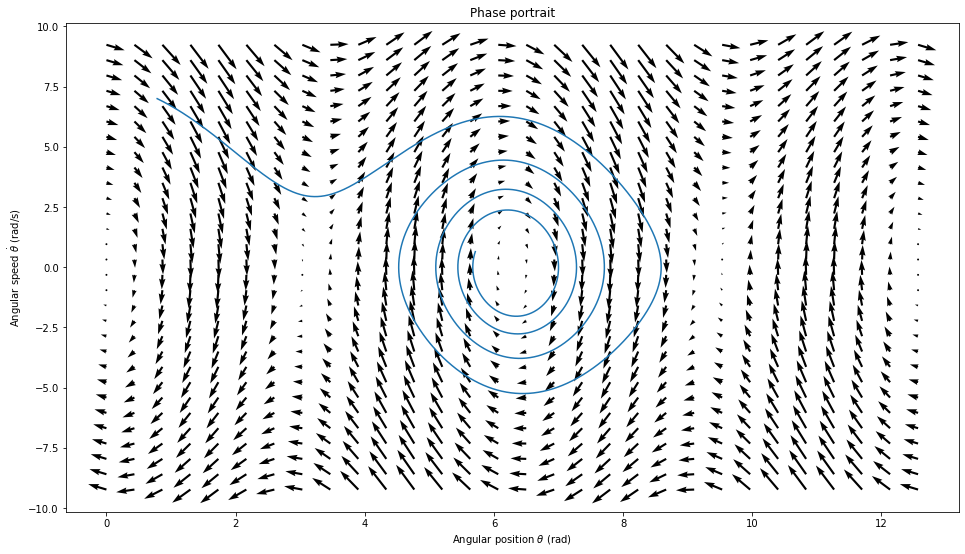

In [8]:
#And example of how to display the estimated direction of angular behaviour (phase portrait)

# prepare to plot
fig, ax = plt.subplots(figsize=(16,9))

# create a trace of an starting point
THETA_0 = np.pi / 4
THETA_DOT_0 = 7
theta, theta_dot, theta_list, theta_dot_list = state(THETA_0, THETA_DOT_0, 10)
ax.plot(theta_list, theta_dot_list)

# plot the phase portrait
X = np.linspace(0, 4*np.pi, 30) #values of angular position
Y = np.linspace(-(0.3)*(g/L)*np.pi, (0.3)*(g/L)*np.pi, 30) #values of angular speed
uu, vv = np.meshgrid(X, Y)
u = np.zeros(uu.shape) #values of angular position
v = np.zeros(vv.shape) #values of angular speed
t = 0.000002
for i in range(Y.shape[0]):
    for j in range(X.shape[0]):
        theta, theta_dot, theta_list, theta_dot_list = state(uu[i,j],vv[i,j],t)
        u[i,j] = theta - uu[i,j]
        v[i,j] = theta_dot - vv[i,j]
q = ax.quiver(uu, vv, u, v)
ax.set_title('Phase portrait')
ax.set_xlabel(r'Angular position $\theta$ (rad)')
ax.set_ylabel(r'Angular speed $\dot{\theta}$ (rad/s)')
plt.show()

When we add the motor, we are actualy applieng an additional force on the pendulum. Think of what would happen when the motor stops and the pendulum is in an horizontal possition, how is this stopping (negative acceleration) translated to the pendulum? Now think of what would happen if the pendulum is in a vertcal position. For now we only consider the effect on the pendulum (and not the motor). 

**Question [5 points]:** write down the equation of angular acceleration of the pendulum with acceleration of the motor included.

**Answer** 
The equation of the angular acceleration of the pendulum considering the rod massless is:<br>
$\ddot{\theta} = -\frac{g}{L}\sin\theta - \mu\dot{\theta} -\frac{a}{L}\cos\theta $

In [9]:
# you will get an aditional value that infuences theta_double_dot
g = 9.8
L = 1
mu = 0.3

In [10]:
# add the new acceleration parameter
def get_theta_double_dot_with_a(theta, theta_dot, a_motor):
    theta_double_dot_with_a = (-1) * ( g/L ) * np.sin(theta) - mu * theta_dot - (a_motor/L) * np.cos(theta)
    return theta_double_dot_with_a
# return the angular acceleration of the pendulum

Now that we have a new equation for the angular acceleration,  
we should model the expected response of the motor when it is turned on.  
In the prototype direction of motion, speed and duration are input to drive the motor.  
for now we can assume that that only the motor speed is of infuence on the acceleration.

In [11]:
'''
a basic idea of what the acceleration of the motor could look like is shown below.
feel free to come up with a more realistic version,   
in the next lab we will expiriment to see what the actual acceleration functions look like
with inversing the direction, these functions will be flipped. 
''' 


'\na basic idea of what the acceleration of the motor could look like is shown below.\nfeel free to come up with a more realistic version,   \nin the next lab we will expiriment to see what the actual acceleration functions look like\nwith inversing the direction, these functions will be flipped. \n'

In [12]:
%%html
<?xml version="1.0" encoding="utf-8"?>
<!-- Generator: Adobe Illustrator 16.0.0, SVG Export Plug-In . SVG Version: 6.00 Build 0)  -->
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px"
	 width="686.127px" height="556.591px" viewBox="0 0 686.127 556.591" enable-background="new 0 0 686.127 556.591"
	 xml:space="preserve">
<path fill="#FFFFFF" stroke="#000000" stroke-miterlimit="10" d="M52.001,112.578h22.535c0,0,3.521-59.859,64.084-59.859
	c57.042,0,62.676,59.859,62.676,59.859h159.858c0,0-0.704,72.387,68.311,71.683c56.335-0.575,56.338-75.908,56.338-75.908"/>
<path fill="#FFFFFF" stroke="#000000" stroke-miterlimit="10" d="M52.367,259.761h22.535c0,0,0.027-102.817,60.591-102.817
	c57.042,0,66.17,102.817,66.17,102.817h159.858c0,0,0.728,107.743,69.746,107.746c59.536,0.003,54.902-111.971,54.902-111.971"/>
<path fill="#FFFFFF" stroke="#000000" stroke-miterlimit="10" d="M52.409,427.366h22.535c0,0,3.521-59.859,64.084-59.859
	c57.042,0,62.676,59.859,62.676,59.859h320.858c0,0-2.704,72.387,66.311,71.682c56.335-0.574,56.339-75.906,56.339-75.906"/>
<line fill="none" stroke="#000000" stroke-miterlimit="10" x1="52.001" y1="23.845" x2="52.001" y2="518.916"/>
<rect x="18.521" y="530.183" fill="none" width="124.648" height="52.816"/>
<text transform="matrix(1 0 0 1 18.5215 538.7744)" font-family="'ArialMT'" font-size="12">Start of motor</text>
<rect x="302.07" y="394.225" fill="none" width="124.648" height="52.816"/>
<text transform="matrix(1 0 0 1 311.3618 402.8164)"><tspan x="0" y="0" font-family="'ArialMT'" font-size="12">Increase duration of </tspan><tspan x="24.357" y="14.4" font-family="'ArialMT'" font-size="12">active time</tspan></text>
<rect x="219.337" y="235.817" fill="none" width="124.648" height="52.816"/>
<text transform="matrix(1 0 0 1 240.6353 244.4087)" font-family="'ArialMT'" font-size="12">Increase speed</text>
<rect x="219.338" y="58.208" fill="none" width="124.649" height="52.816"/>
<text transform="matrix(1 0 0 1 222.6274 66.7998)"><tspan x="0" y="0" font-family="'ArialMT'" font-size="12">Expected acceleration </tspan><tspan x="10.345" y="14.4" font-family="'ArialMT'" font-size="12">as function of time</tspan></text>
</svg>


**[5 points]:** Now create a class that creates these functions with inputs: direction, speed and duration (in simulation steps)

In [13]:
# https://www.researchgate.net/figure/One-example-of-the-typical-trajectories-of-motor-position-velocity-acceleration-and_fig2_4157062

class Motor_Acc: # direction, speed, duration, dt (the delta_t is necessary for numerical integration)
    def __init__(self, direction, speed, duration, dt):#speed is the maximum speed
        self.direction = direction  # 0 (left) or 1 (right)
        self.speed = speed          # meter per second
        self.duration = duration    # seconds
        self.dt = dt                # Hertz
        self.time = 0
        # how many tiks do we have?
        # ANS: time x dt
        self.tiks = int(self.duration / self.dt)
        self.func = self.create_func()
    
    def create_func(self): #create a list of accelerations    
        # The maximum acceleration for this motor is going to be 50m/s2
        max_acc = 50.0
        
        # The jerk of this motor is going to be 2000m/s3
        # We are assuming contant jerk
        jerk = 2000.0#m/s^3
        
        # Lets build the list
        func_list = []#list of acceleration values
        v_list = []#list of speed values
        short_mov = False #this variable is for making sure that the motor does not increase velocity infinetly, 
        #it'd change to True if the number of acceleration values reaches half of the 'tiks'
        
        # initial condition
        acc = 0.0
        v = 0.0

        # First half
        # -----------------------------------------------------------------------------------------------------
        # speed up
        while v < self.speed and not short_mov:
            # if there is no time to full movement
            # perform a shorter movement.
            if len(func_list) > int(self.tiks/2):
                short_mov = True
                break

            # acceleration up
            while acc < max_acc and not short_mov:
                # if there is no time to full movement
                # perform a shorter movement.
                if len(func_list) > int(self.tiks/2):
                    short_mov = True
                    break
                if v >= self.speed: break

                acc = acc + jerk * self.dt#intgration step, calculating new value of acceleration 
                v = v + acc * self.dt#integration step, calculating new value of velocity
                v_list.append(v)
                func_list.append(acc)

            # Speed up constant acceleration
            if not short_mov: acc = max_acc#in case we haven't reached half of the tiks, we make he acceleration value = max 
            v = v + acc * self.dt#calculate new velocity value when we have reached max. acceleration
            v_list.append(v)
            func_list.append(acc)

        # acceleration down
        while acc > 0 and not short_mov:#we have reached the maximum speed
            # if there is no time to full movement
            # perform a shorter movement.
            if len(func_list) > int(self.tiks/2):
                short_mov = True
                break
            # acceleration down
            acc = acc - jerk * self.dt #integration for calculating new acc values
            v = v + acc * self.dt#integration for calculating new v values
            v_list.append(v)
            func_list.append(acc)

        # coasting
        acc = 0.0

        # until the half of the time
        while len(func_list) < int(self.tiks/2) and not short_mov:
            v_list.append(v)
            func_list.append(acc)

        # Second half
        # -----------------------------------------------------------------------------------------------------
        # The other half of the list is just inverted and mirrored
        
        while len(func_list) < self.tiks:
            v_list.append(v_list[self.tiks-len(v_list)-2])
            func_list.append(-func_list[self.tiks-len(func_list)-2])

        # if the numbers of tiks does not match, adjust
        while len(func_list) <= self.tiks:
            v_list.append(0)
            func_list.append(0)
        
        if self.direction == 0: # left
            for i in range(len(func_list)):
                func_list[i] = (-func_list[i])

#         # plot
#         fig, ax = plt.subplots(figsize=(16,9))
#         ax.plot(np.array(func_list)/10, label='acc')
#         ax.plot(v_list, label='v')
#         ax.legend()
#         plt.show()
  
        return func_list
        
    def tik(self):
        '''
        return the acceleration at a given time and shift the time
        '''
        self.time = self.time + 1
        if self.time < self.tiks:
            return self.func[self.time]
        else:
            return 0. #return an acceleration of 0
    
    def set_motor(self, direction, speed, duration, dt):
        self.direction = direction  # 0 (left) or 1 (right)
        self.speed = speed          # meter per second
        self.duration = duration    # seconds
        self.dt = dt                # Hertz
        self.time = 0
        # how many tiks do we have?
        # ANS: time x dt
        self.tiks = int(self.duration / self.dt)
        self.func = self.create_func()

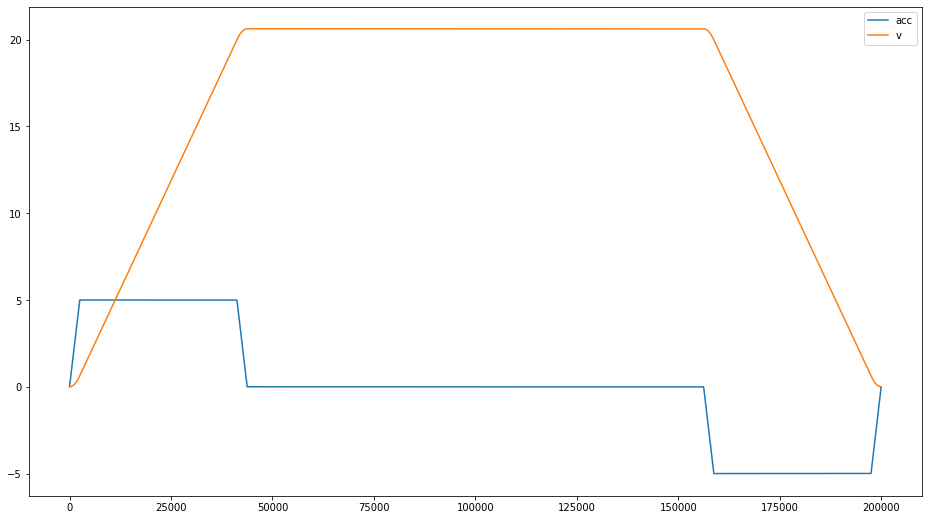

In [14]:
# test the class
motor = Motor_Acc(direction = 1, speed = 20, duration = 2, dt = dt)
v = 0
v_list = []
a_list = []
for i in range(int(2/dt)):
    a = motor.tik()
    v = v + a * dt
    v_list.append(v)
    a_list.append(a)
# plot
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(np.array(a_list)/10, label='acc')
ax.plot(v_list, label='v')
ax.legend(loc='upper right')
plt.show()

In [15]:
# Now we can add the motor in the simulation
direction = 1
speed = 10
duration = 2

# Initial conditions of pendulum
THETA_0 = 0.01
THETA_DOT_0 = 0.01

motor = Motor_Acc(direction, speed, duration, dt)

In [16]:
# Solving the angular behaviour of the pendulum numerically for an given input time t (in seconds)
def state_with_motor(t):
    
    theta = THETA_0
    theta_dot = THETA_DOT_0
    
    theta_sum = []
    theta_dot_sum = []
    for time in np.arange(0,t,dt):
        '''
        Now the motor is running from the start of the simulation. 
        Eventually we want to start the motor according to how we want to control it (next lab). 
        Now create 2 list to keep track of theta and theta_dot to visualize the progress.
        '''
        #Create lists
        a_of_motor = motor.tik()
        theta_double_dot = get_theta_double_dot_with_a(theta, theta_dot, a_of_motor)
        theta += theta_dot * dt
        theta_dot += theta_double_dot * dt
        # append theta and theta_dot to lists
        theta_sum.append(theta)
        theta_dot_sum.append(theta_dot)
    #return the lists
    return theta_sum, theta_dot_sum

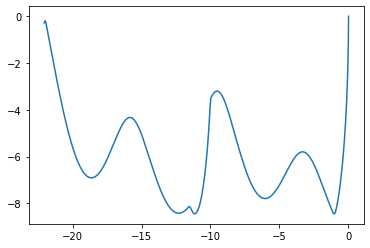

In [17]:
t = 5
theta_sum, theta_dot_sum = state_with_motor(t)
plt.plot(theta_sum, theta_dot_sum)
plt.show()

**[5 points]:** Create different motor controls and different initial conditions. 
Plot what happens and point out the first motor settings that will increase the angle the most. 

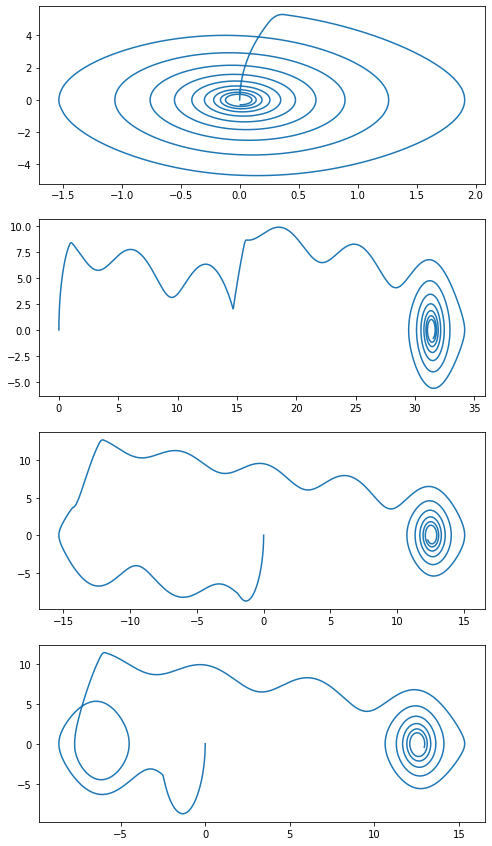

In [18]:
x = 4
fig, axs = plt.subplots(x,figsize=(8,15))

t = 20
directions = [0, 0, 1, 1]
speeds = [5, 10, 15, 20]
durations = [2, 3, 4, 5]

# Initial conditions of pendulum 

# A_THETA_0_=np.linspace(0, 4*np.pi, x)
# A_THETA_DOT_0_=np.linspace(-(0.3)*(g/L)*np.pi, (0.3)*(g/L)*np.pi, x)
A_THETA_0_ = 0
A_THETA_DOT_0_ = 0

for n in range(x):
    THETA_0=A_THETA_0_#[n]
    THETA_DOT_0=A_THETA_DOT_0_#[n]
    motor = Motor_Acc(directions[n], speeds[n], durations[n],dt)
    theta_sum, theta_dot_sum = state_with_motor(t)
    axs[n].plot(theta_sum, theta_dot_sum)


The maximum influence of the motor is when theta is close to 0° and 180°.

**Bonus Question:** Create a 3d phase portait of the pendumum in terms of theta, theta_dot and motor acceleration. Use one acceleration function as sequential input in z (so the arrows will all point in one direction in the z-axis). This shows a time series evolution of the system for initial conditions theta and theta_dot given an motor function. Can you find areas where acceleration is of low effect and high effect?

<IPython.core.display.Javascript object>


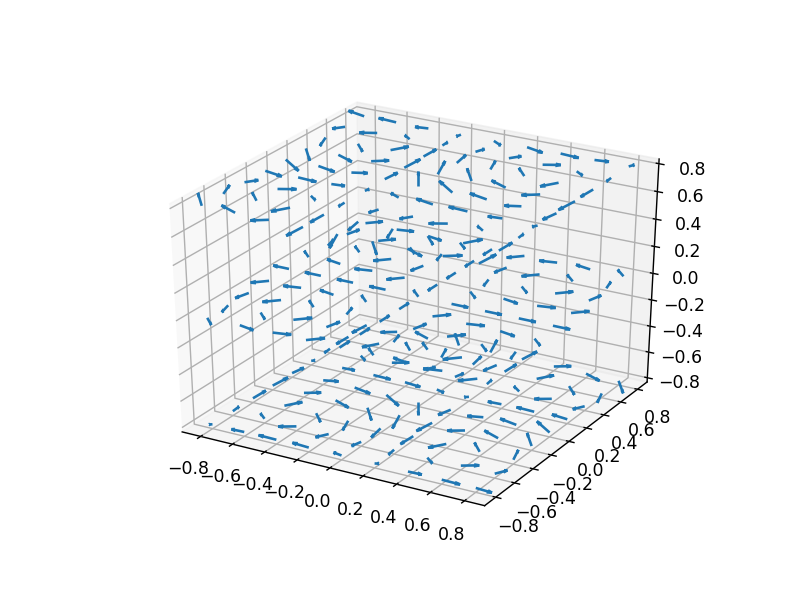

In [19]:
%matplotlib notebook
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()